# yolov10


In [1]:
!pip install ultralytics

   ---------------------------------------- 0.0/899.0 kB ? eta -:--:--
   ---------------------------------------- 899.0/899.0 kB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   - -------------------------------------- 1.3/44.8 MB 5.2 MB/s eta 0:00:09
   - -------------------------------------- 1.8/44.8 MB 4.2 MB/s eta 0:00:11
   -- ------------------------------------- 2.6/44.8 MB 4.3 MB/s eta 0:00:10
   --- ------------------------------------ 3.4/44.8 MB 3.7 MB/s eta 0:00:12
   --- ------------------------------------ 4.5/44.8 MB 4.1 MB/s eta 0:00:10
   ----- ---------------------------------- 5.8/44.8 MB 4.3 MB/s eta 0:00:10
   ----- ---------------------------------- 6.6/44.8 MB 4.3 MB/s eta 0:00:09
   ------ --------------------------------- 7.3/44.8 MB 4.3 MB/s eta 0:00:09
   ------- -------------------------------- 7.9/44.8 MB 4.1 MB/s eta 0:00:10
   -------- ------------------------------- 9.2/44.8 MB 4.2 MB/s eta 0:00:09
   ------

In [5]:
import sys
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

import torch
from torchvision.io import read_image
from torchvision import models, transforms, datasets

In [6]:
classNames = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 
    'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 
    'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 
    'potted plant', 'bed', 'dining table', 'toilet', 'TV', 'laptop', 'mouse', 
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 
    'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 
    'toothbrush'
]


In [ ]:
from ultralytics import YOLO

cap = cv2.VideoCapture("./fig/fig/video/vtest.avi")

if not cap.isOpened():
    print("video no")
    sys.exit()
model = YOLO("yolov10m.pt") # 원하는 모델

thershold = 0.6
tm = cv2.TickMeter()
Class_names=model.names

while True:
    tm.reset()
    ret, frame = cap.read()

    if not ret:
        break
    fps_list = []
    tm.start()
    detection = model(frame, verbose = False)[0] # 실제 모델이 learning될때의 시간 
    tm.stop()
    total = tm.getTimeMilli()
    
    fps = f"fps={1000/total:.3f}"
    fps_list.append(1000/total)

    for data in detection.boxes.data.tolist():
        confidence = data[4]

    if confidence > thershold:
        xmin, ymin, xmax, ymax = int(data[0]), int(data[1]), int(data[2]), int(data[3])
        label = int(data[5])
        cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        text = f"{Class_names[label]}: {confidence*100:.2f}%"
        cv2.putText(frame, text, (xmin, ymin - 1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 1, cv2.LINE_AA)

    cv2.putText(frame, fps, (20, 20), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 1, cv2.LINE_AA)
    cv2.imshow("frame", frame)

    if cv2.waitKey(30)==27:
        break

cap.release()
cv2.destroyAllWindows()

mean fps =  13.049310735406955


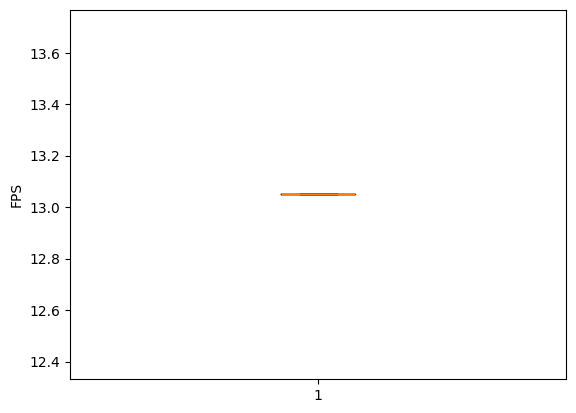

In [32]:
print("mean fps = ", np.mean(fps_list))
plt.boxplot(fps_list, showfliers=False)
plt.ylabel('FPS')
plt.show()

In [31]:
cap = cv2.VideoCapture("./fig/fig/video/vtest.avi")

if not cap.isOpened():
    print("video open failed")
    sys.exit()

model = YOLO("yolov10m.pt")
model =YOLO("yolov10n.pt")

threshold= 0.6
tm=cv2.TickMeter()
Class_names=model.names
while True:
    tm.reset()
    ret,frame =cap.read()
    
    if not ret:
        break
    fps_list = []
    tm.start()
    detection = model(frame, verbose = False)[0] # 실제 모델이 learning될때의 시간 
    tm.stop()
    total = tm.getTimeMilli()
    fps = f"fps={1000/total:.3f}"
    fps_list.append(1000/total)

    for data in detection.boxes.data.tolist():
        confidence = data[4]

        if confidence > threshold:
            xmin,ymin,xmax,ymax = int(data[0]),int(data[1]),int(data[2]),int(data[3]) 
            label=int(data[5])

            cv2.rectangle(frame,(xmin ,ymin),(xmax ,ymax), (0,0,255),2)
            label = f"{Class_names[label]}:{confidence*100:.2f}%"
            cv2.putText(frame,label,(xmin,ymin-2),cv2.FONT_HERSHEY_COMPLEX,
                        1,(0,0,255),1,cv2.LINE_AA)
    cv2.putText(frame,fps,(20,20),cv2.FONT_HERSHEY_SIMPLEX,0.6,(255,0,0),2,cv2.LINE_AA)
    cv2.imshow("fream",frame)

    if cv2.waitKey(30) ==27:
        break

cap.release()
cv2.destroyAllWindows()

100%|██████████| 5.59M/5.59M [00:01<00:00, 4.67MB/s]


In [7]:
## yolov3

import os

img_list = os.listdir("./fig/fig/object_detection")
print(img_list)

img_paths = []
for i in img_list:
    img_path = "./fig/fig/object_detection/" + i # 폴더에 있는 것들 다 불러옴
    img_paths.append(img_path)

model = "yolov3.weights"
config = "yolov3.cfg"
class_labels = classNames

net = cv2.dnn.readNet(model, config)

if net.empty():
    print("net empty")
    sys.exit()


##출력 layer
net.getUnconnectedOutLayers() # out layer
layer_names = net.getLayerNames()
output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]
output_layers

['dog_576x768.jpg', 'kite.jpg', 'person.jpg', 'sheep.jpg']


['yolo_82', 'yolo_94', 'yolo_106']

In [22]:
confThreshold = 0.5
nmsThreshold = 0.4 # IoU가 0.4이상 버린다 -> 같은 객체를 찾았을 확률이 큼
for i in img_paths:
    img = cv2.imread(i)

    if img is None:
        print("image failed")
        sys.exit()

    # prequency
    blob = cv2.dnn.blobFromImage(img, 1/255., (320, 320), swapRB=True) #swapRB R와 B채널을 바꿔서 넣어라.
    net.setInput(blob)
    outs = net.forward(output_layers) # 3군데에서 output을 뽑아라
    # 그냥 forward만 하면 맨 앞에서만 출력돼서 한 파일 마다 모두 다 뽑기 위해선 output_layers

    h, w = img.shape[:2]

    class_ids = []
    confidences = []
    boxes = []

    # 이미지 마다 모든 과정을 다 해줘야됨됨
    for out in outs:
        for detection in out:
            score = detection[5:]
            class_id = np.argmax(score) # argmax(): 가장 높은 값이 있는 좌푯값
            confidence = score[class_id] # 가장 높은 값이 있는 score 값
            if confidence > confThreshold:
                cx = int(detection[0]*w) # bbox의 center 값값
                cy = int(detection[1]*h)
                bw = int(detection[2]*w)
                bh = int(detection[3]*h)

                sx = int(cx-bw/2)
                sy = int(cy-bh/2)
                
                boxes.append([sx, sy, bw, bh])
                confidences.append(confidence)
                class_ids.append(class_id)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)

    for i in indices:
        sx, sy, bw, bh = boxes[i]
        label = f"{class_labels[class_ids[i]]}:{confidences[i]*100:.2f}%"
        cv2.rectangle(img, (sx, sy, bw, bh), (0, 0, 255), 1)
        cv2.putText(img, label, (sx, sy-2), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)

    cv2.imshow("img", img)
    cv2.waitKey()

cv2.destroyAllWindows() 



In [ ]:
h, w = img.shape[:2]

class_ids = []
confidence = []
boxes = []

for out in outs:
    for detection in out:
        score = detection[5:]
        class_id = np.argmax(score) # argmax(): 가장 높은 값이 있는 좌푯값
        confidence = score[class_id] # 가장 높은 값이 있는 score 값
        if confidence > confThreshold:
            cx = int(detection[0]*w) # bbox의 center 값값
            cy = int(detection[1]*h)
            cw = int(detection[2]*w)
            ch = int(detection[3]*h)

            sx = int(cx-bw/2)
            sy = int(cy-bh/2)
            
            boxes.append([sx, sy, bw, bh])
            confidence.append(confidence)
            class_ids.append(class_id)


